In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

<a id='top'></a>

In [2]:
from IPython.display import HTML

def hide_code():
	return HTML('''<script>code_show=false; function code_toggle() {if (code_show){$("div.input").hide();} else {
    $("div.input").show();}code_show = !code_show} $( document ).ready(code_toggle);</script>The raw code 
    could be hidden for easier reading.<br> To toggle on/off the raw code, 
    click <a href="javascript:code_toggle()">here</a>.''')
hide_code()

# Table of Content
- [1. Introduction of Titanic Project](#1. Introduction of Titanic Project)
- [2. Overview of The Data](#2. Overview of The Data) 
- [3. K-NN by using 1st prepared data](#3. K-NN by using 1st prepared data)
- - Drop Name and convert Emarked to numbers
- [4. K-NN by using 2nd prepared Data](#4. K-NN by using 2nd prepared Data) 
- - Based on 1st prepared data, combine SibSp and Parch, add back Name and extract title from Name
- [5. K-NN by using 3rd prepared data](#5. K-NN by using 3rd prepared data)
- - Based on 2nd prepared data, scale age and fare in range such as 1,2,3...etc.
- [6. Predict Test data](#6. Predict Test data)

<a id='1. Introduction of Titanic Project'></a>

# 1. Introduction of Titanic Project

> ## 1. a) Description of the project
> > The singking of the Titanic is one of the most shipwrecks in history, killing 1502 out of 2224 passengers and crews. Surviving from this tragedy depends some element of luck, however, there are some groups of people more likely to survive than others, such as women, children and upperclass. <br>
> > In this project, we are going to predict whether an individual would be survived or not, given his or her information such as gender, class and age, by using K-nearest neighbor algorithm.

> ## 1. b) Basic explanation of K-NN
> > K-NN is a supervised machine learning algorithm that is to find the a class membership for the output based on predefined training samples by looking for the closest features in distances. There are more than one algorithm for calculating distance such as Euclidean, Manhattan, Minkowski and so on. One of the important issues in K-nn is that standardization for data is important, because for a mixture of numerical and categorical variables, they have different scales. Measuring distance from different scales will result in the output tends to lean on the variable which has larger numbers.

> ## 1. c) Implementing K-NN and Tuning Parameters
> > In this project, we have train dataset and test dataset where train data has target output for supervising learning but test set does not. Therefore, the approach here is to split train data into 2 sets which are train and test, with split ratio of 8/2. 

> > There are several parameters can be tuned in K-NN algorithm. Listing couple parameters below:

> > **n_neighbors**: the number of neighbors that the input data point will search and giving output by based on the nearest n.

> > **power**: defining the distance calculation method. p=1 uses Manhattan distance, p=2 uses Euclidean distance.

> > **weights**: the weight for each neighbor. 'uniform' is giving each neighbor weighted equally. 'distance' weight points by the inverse of their distance. <br>

> > Parametes used in this project are n_neighbors and power. The results for each K-NN implementation include Manhattan distance and Euclidean distance with different K value. The k neighbors tried in this project are from 2 to 10. We are going to pick the most convincingly highest K value. <br>
> > The overall accuracy continues to improve as we put more effort on civilization of varaibles. The 3rd K-NN has the overall highest accuracy among the other two. In the last K-NN implementation, the test set's accuracy stablized for K equals between 3 to 7 while train set also has stable high accuracy. We chose K=5 because it is in the middle so that it could somewhat avoid overfitting and underfitting.

> ## 1. d) Civilization of Component
> > There are mainly 3 stages for civilization of components.
> > Firstly, we did data imputation for missing values. And we dropped unuseful features which are passenger ID, ticket number and cabin number. We also convert categorical feature to integers such as Sex and Embarked feature.
> > Secondly, we merged two features, SibSp and Parch, into one feature as Family calculated by summing them up. Additionally, we extract title information from Name feature in order to have additional class information. This modification of features is a means to improve accuracy for our K-NN analysis.
> > Thirdly, we scaled features for Age and Fare to a reasonable range. This is done for avoiding outliers such that some fare has far higher than others, which also could accuracy for the K-NN. Basically, we group similar people together based on their age and fare. It is useful and reasonable since they share similar properties.
> > Civilization of components are analyzed step by step. <br> In section 2, 3, 4 and 5 all have discussions about civilization of components. Please use links in Table of Content for specific discussion.


> ## 1. e) Table Comparison for Method of Choice
> > As analysis in this project, we found that the 3rd K-NN implementation has the highest accuracy.
> > In the 1st K-NN, Manhattan distance is better than the Eucliean distance method overall. The accuracy for test set is ranged from 70% to 75% approximately. 
> > In the 2nd K-NN, Manhattan distance is still better than the Euclidean distance method. And the accuracy for test set is ranged from 75% to 80%.
> > In the 3rd K-NN, Euclidean is finlly better than the Manhattan and has accuracy about 85%. The reason of outperformance of Euclidean may due to the scaled data. On the other hand, Manhattan distance method is better for some K value and worse for some other K value. Manhattan has up and down curve while Euclidean has more stable curve. We want to have a stable and predictable result of final test set thus choosing Euclidean method.
> > We see the accuracies are in the good numbers while k values between 3 and 7 thus choosing 5 for our predictions.
> > Please see 6. a) for discussion of comparison.  [6. Table comparison](#6. Predict Test data)

<a id='2. Overview of The Data'></a>

# 2. Overview Of The Data

## 2. a) Loading and Displaying Data

In [3]:
train_set = pd.read_csv('/Users/tWo/Documents/UTD/BUAN 6341 Machine Learning/Project 1/train.csv')
test_set = pd.read_csv('/Users/tWo/Documents/UTD/BUAN 6341 Machine Learning/Project 1/test.csv')
full_data = [train_set, test_set]
passenger_id = test_set['PassengerId']

train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('The data type for each variable is listed below:', '\n')
print(train_set.dtypes, '\n')
print('The train set has {0:4d} rows and {1:2d} variables.'.format(train_set.shape[0], train_set.shape[1]))
print('The test set has {0:4d} rows and {1:2d} variables.'.format(test_set.shape[0], test_set.shape[1]))

The data type for each variable is listed below: 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object 

The train set has  891 rows and 12 variables.
The test set has  418 rows and 11 variables.


## 2. b) Finding Missing Values.

In [5]:
print('Missing values count in train set:')
display(pd.DataFrame( train_set.isnull().sum() ).T)
print('Missing values count in test set:')
display(pd.DataFrame( test_set.isnull().sum() ).T)
print('\n')

Missing values count in train set:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0,0,177,0,0,0,0,687,2


Missing values count in test set:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0,86,0,0,0,1,327,0


**Age**: There are 263 missing values in age in both sets. The percentage of missing values in Age is still acceptable thus it should be imputated. The approach here is to use random number ranged from mean +/- 1std separated in each set for their missings. 

**Embarked**: It has 2 missing values. This variable indicates that the location where people were boarded. It is not a good source for determining survival because survival should not be related to boarding location. However, data imputation will be implemented here since there are only 2 missings.

**Fare**: There is only 1 missing value in test set, here will be using the mean value of its corresponding Pclass as these two variables appear to be somewhat related.

**PassengerId**: It is not a meaningful variable, so it will be dropped.

**Cabin**: As observed above, there are 1014 missing values in Cabin out of 1308 which is too many missing values. Firstly, it is meaningless impute values. Secondly, fare is more intuitive and simply on delievering information about wealthy. Thus this variable will be simply dropped from the data.

**Ticket**: This column lists the ticket number for each person which is not useful for this analysis. Dropping this variable. 

## 2. c) Filling Missings 

### Embarked

Here will be using the mode for missing Embarked values.

In [6]:
print('The occurrence for Emarking location:', '\n')
print(train_set['Embarked'].value_counts(), '\n')
print('The most occurrence value in Embarked in train set is {:^1}.'.format(train_set['Embarked'].mode()[0]))
a = np.where(train_set['Embarked'].isnull())[0][0]
b = np.where(train_set['Embarked'].isnull())[0][1]
print('They are in row of {0:2d} and {1:3d}.'.format(a, b))
print('They are now filled with "S".')

train_set['Embarked'].fillna(train_set['Embarked'].mode()[0], inplace=True)

The occurrence for Emarking location: 

S    644
C    168
Q     77
Name: Embarked, dtype: int64 

The most occurrence value in Embarked in train set is S.
They are in row of 61 and 829.
They are now filled with "S".


### Fare

There is only 1 missing value in Fare, we use mean of fare of its corresponding class.

In [7]:
a = np.where(test_set['Fare'].isnull())[0][0]
b = test_set.loc[a,'Pclass']
c = test_set[['Pclass', 'Fare']].groupby(['Pclass']).mean()
print(c, '\n', '\n', 'Thus missing value will be using {0:6f}'.format(c.ix[b,0]))

test_set['Fare'].fillna(c.ix[b,0], inplace=True)

             Fare
Pclass           
1       94.280297
2       22.202104
3       12.459678 
 
 Thus missing value will be using 12.459678


### Age

Filling the missing values for Age using random integer ranged from mean-std to mean+std.

In [8]:
age_before_fill = train_set['Age']

for data in full_data:
    age_mean = data['Age'].mean()
    age_std  = data['Age'].std()
    age_missing_count = data['Age'].isnull().sum()
    np.random.seed(1234)
    age_random_impute = np.random.randint(low=age_mean-age_std, high=age_mean+age_std, size=age_missing_count)
    data['Age'][np.isnan(data['Age'])] = age_random_impute
    
age_after_fill = train_set['Age']

print('Function used is shown here:')
print('np.random.randint(low=age_mean-age_std, high=age_mean+age_std, size=age_missing_count)')

Function used is shown here:
np.random.randint(low=age_mean-age_std, high=age_mean+age_std, size=age_missing_count)


#### Displaying the distribution of Age before and after filling missing values

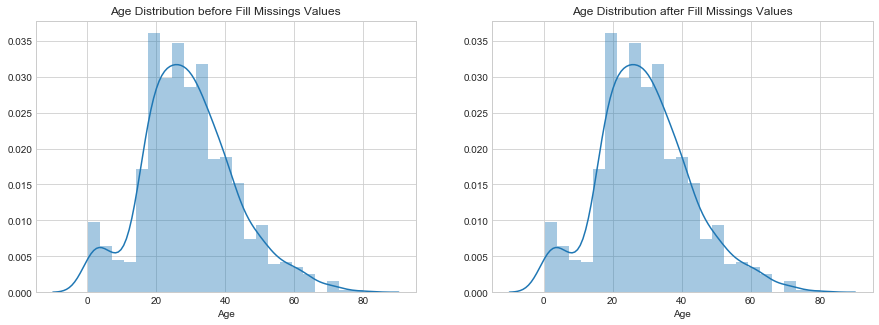

In [9]:
plt.figure(1, figsize=(15,5))
plt.subplot(1,2,1)
ax1 = sns.distplot(age_before_fill)
plt.title('Age Distribution before Fill Missings Values')

plt.figure(1, figsize=(15,5))
plt.subplot(1,2,2)
ax2 = sns.distplot(age_after_fill)
plt.title('Age Distribution after Fill Missings Values')

plt.show()

The graphs above shows the age distribution for before filling missing values and after filling missing values in train set. And there is no obvious distribution change as seen in graphs. <br>
Age distribution for test set is not provided.

## 2. d) Checking data after Filling Missings

Printing count-table for train and set for missings.

In [10]:
print('Counting Missings for Train:')
display(pd.DataFrame(train_set.isnull().sum() ).transpose())
print('Counting Missings for Test:')
display(pd.DataFrame(test_set.isnull().sum() ).transpose())

Counting Missings for Train:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0,0,0,0,0,0,0,687,0


Counting Missings for Test:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0,0,0,0,0,0,327,0


We see the above list that there are no more missing values in Age, Fare and Embarked.<br>
Cabin is ignored because we are going to drop it. Cabin does not provide effective information here.

Next, We are going to drop those unnecessary variables as discussed earlier: *PassengerId, Ticket, Cabin*.

## 2. e) Dropping Features

#### Dropping *PassengerId, Ticket* and *Cabin*. 
#### The reasons for dropping these features are explained in section 2.b)

In [11]:
for data in full_data:
    data.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

print('Train set:')
display(train_set.head(2))
print('Test set:')
display(test_set.head(2))

Train set:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C


Test set:


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S


As shown above, the train and test sets no longer have these features.

## 2. f) Visualization of Some Features

### Pclass

In [12]:
def var_vs_survived(var):
    rate = train_set[[var, 'Survived']].groupby([var]).mean().T
    return rate

var_vs_survived('Pclass')

Pclass,1,2,3
Survived,0.62963,0.472826,0.242363


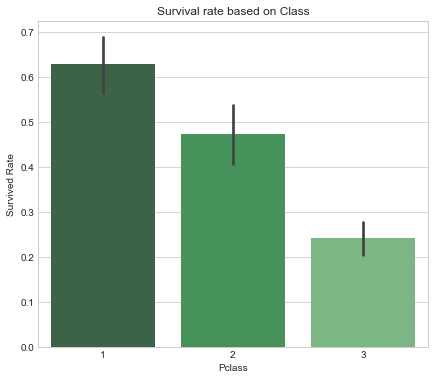

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(7,6)
ax = sns.barplot( x='Pclass', y='Survived', order=[1,2,3], data=train_set, palette='Greens_d' )
ax.set_ylabel('Survived Rate')
plt.title('Survival rate based on Class')
plt.show()

As observed here, the higher the class, the higher change of survival.

#### Assigning Class 1 = 3,  Class 2 = 2, Class 3 = 1

Ranking is based on survival rate

In [14]:
display(train_set.head())
for data in full_data:
    data['Pclass'].loc[data['Pclass'] == 1 ] = 4
    data['Pclass'].loc[data['Pclass'] == 3 ] = 1
    data['Pclass'].loc[data['Pclass'] == 4 ] = 3

train_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,1,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,1,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


#### Predict  by using Pclass factor

In [15]:
cols1 = ['Pclass']
X1 = train_set[cols1]
y = train_set['Survived']
X1_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=123)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X1_train, y_train)
print('We fit the model and made prediction by using Pclass factor, then we got accuracy is:')
knn.score(x_test, y_test)

We fit the model and made prediction by using Pclass factor, then we got accuracy is:


0.63128491620111726

### Sex

In [16]:
var_vs_survived('Sex')

Sex,female,male
Survived,0.742038,0.188908


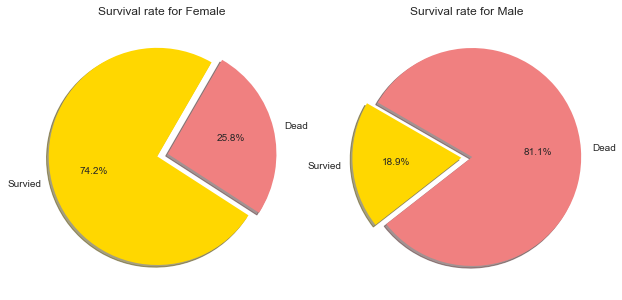

In [17]:
survived_female = train_set[['Sex', 'Survived']].groupby(['Sex']).sum().ix[0,0]
dead_female = train_set['Sex'].value_counts()[1] - train_set[['Sex', 'Survived']].groupby(['Sex']).sum().ix[0,0]
survived_male = train_set[['Sex', 'Survived']].groupby(['Sex']).sum().ix[1,0]
dead_male = train_set['Sex'].value_counts()[0] - train_set[['Sex', 'Survived']].groupby(['Sex']).sum().ix[1,0]

label = 'Survied', 'Dead'
size_1 = [survived_female, dead_female]
size_2 = [survived_male, dead_male]
color = ['gold', 'lightcoral']
explode = (0.1, 0)


plt.figure(1, figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(size_1, explode=explode, labels=label, colors=color, autopct='%1.1f%%', shadow=True, startangle=60)
plt.axis('equal')
plt.title('Survival rate for Female')

plt.figure(1, figsize=(10,5))
plt.subplot(1,2,2)
plt.pie(size_2, explode=explode, labels=label, colors=color, autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Survival rate for Male')

plt.show()

It is obvious that female has much higher chance to survive.

#### Converting strings to integer for representing Sex

In [18]:
for data in full_data:
    data['Sex'] = data['Sex'].map({ 'female':0, 'male':1 }).astype(int)

train_set.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C


#### Predict the result by combining Sex factor

In [19]:
cols2 = ['Pclass','Sex']
X2 = train_set[cols2]
X2_train, x_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=123)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X2_train, y_train)
print('We combined sex with Pclass into training model,and we got accuracy is:')
knn.score(x_test, y_test)

We combined sex with Pclass into training model,and we got accuracy is:


0.7988826815642458

### Embarked

In [20]:
var_vs_survived('Embarked')

Embarked,C,Q,S
Survived,0.553571,0.38961,0.339009


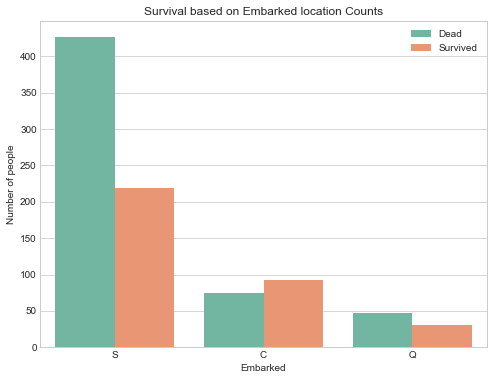

In [21]:
plt.figure(1, figsize=(8,6))
ax = sns.countplot(x='Embarked', hue='Survived', data=train_set, palette='Set2')
ax.legend(['Dead', 'Survived'])
plt.ylabel('Number of people')
plt.title('Survival based on Embarked location Counts')
plt.show()

We can see here that people were embarked at S has higher percentage of dying whereas C has opposite ratio. However, location of where people got on board should not be a factor in logics. <br>
Embarking is kept in features because it may help us on improving the accuracy since at least it will not hurt the accuracy much.

#### Converting *Embarked* to integer.

In [22]:
train_set['Embarked'] = train_set['Embarked'].map({'Q':0, 'C':1, 'S':2}).astype(int)
train_set.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1
2,1,1,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2


#### Adding Embarked to training model

In [23]:
cols2 = ['Pclass','Sex','Embarked']
X3 = train_set[cols2]
X3_train, x_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=123)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X3_train, y_train)
print('The accuracy after add Embarked into training modle is:')
knn.score(x_test, y_test)

The accuracy after add Embarked into training modle is:


0.84357541899441346

### Pairplot

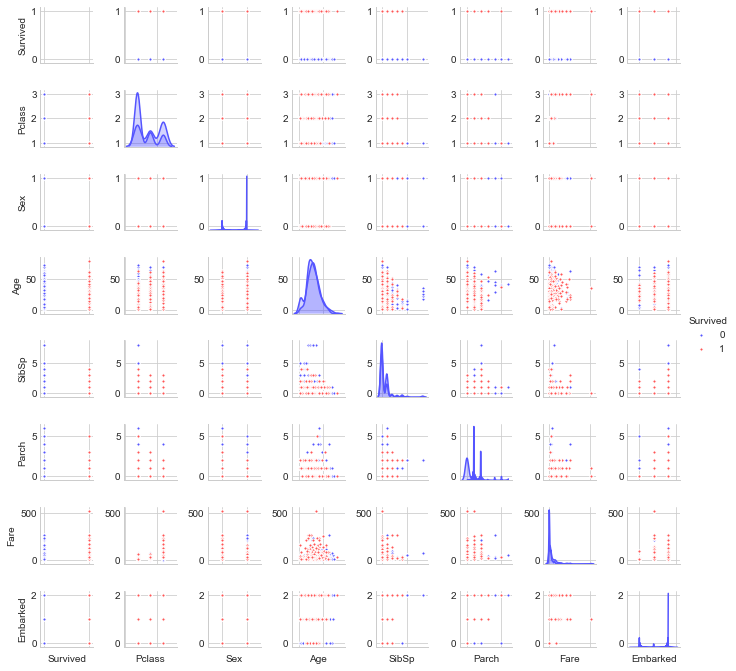

In [24]:
pair_plot = sns.pairplot(train_set, hue='Survived', palette='seismic', size=1.2, diag_kind='kde', 
                         diag_kws=dict(shade=True), plot_kws=dict(s=10))
pair_plot.set(xticklabels=[])
plt.show()

We cannot find too many association rules based on this pairplot. <br>
But the interesting phenominon is that most of female have higher chance to survive, no matter how old she is.

<a id='3. K-NN by using 1st prepared data'></a>

# 3. K-NN by using 1st prepared data
[Back to top](#top)
## 3. a) Splitting data to train and test

#### Making a copy from *train_set* to *train_1* and dropping columns of *Name*.

In [25]:
train_1 = train_set.copy()
train_1.drop(['Name'], axis=1, inplace=True)

# Y = train_1['Survived']
# X = train_1.ix[:,1:]
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
# train_1.head(3)

Here is a snap view of data structure will be using.

In [26]:
train_1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,1,22.0,1,0,7.2500,2
1,1,3,0,38.0,1,0,71.2833,1
2,1,1,0,26.0,0,0,7.9250,2
3,1,3,0,35.0,1,0,53.1000,2
4,0,1,1,35.0,0,0,8.0500,2


## 3. b) Implementing K-NN

Here we are going to use...

In [27]:
## Define a function to implement K-NN and display table and graph for trying different parameters

def highlight_max(x):
    return ['background-color: yellow' if v == x.max() else '' for v in x]

def knn_model(data, n_neighbor, weights=None):
    y = data['Survived']
    x = data.drop(['Survived'], axis=1)
    #np.random.seed(123)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
    
    #global score_table
    if weights is None:
        weights = 'uniform'
    holder = []
    train_holder = []
    for p in [1,2]:
        for n in n_neighbor:
            knn = KNeighborsClassifier(n_neighbors = n, p = p, weights = weights)
            knn.fit(x_train, y_train)
            train_score = knn.score(x_train, y_train)
            test_score  = knn.score(x_test, y_test)

            train_holder.append(train_score)
            holder.append(test_score)
    
    
    k  = pd.DataFrame(n_neighbor, columns=['n_neighbor'])
    p1 = pd.DataFrame(holder[:len(n_neighbor)], columns=['Test_Manhattan'])
    p2 = pd.DataFrame(holder[len(n_neighbor):], columns=['Test_Euclidean_dist'])
    #test_score = pd.concat([k, p1, p2], axis=1)
    
    a = pd.DataFrame(n_neighbor, columns=['n_neighbor'])
    b = pd.DataFrame(train_holder[:len(n_neighbor)], columns=['Train_Manhattan'])
    c = pd.DataFrame(train_holder[len(n_neighbor):], columns=['Train_Euclidean'])
    
    score_table = pd.concat([k, b, p1, c, p2], axis=1)
    
    trace0 = go.Scatter( x = list(range(2,16)), y = score_table.ix[:,1], mode = 'lines_markers', name = 'Trian_Manhattan',
                       marker=dict({'size':8}))
    trace1 = go.Scatter( x = list(range(2,16)), y = score_table.ix[:,2], mode = 'lines_markers', name = 'Test_Manhattan',
                       marker=dict({'size':8}))
    trace2 = go.Scatter( x = list(range(2,16)), y = score_table.ix[:,3], mode = 'lines_markers', name = 'Trian_Euclidean',
                       marker=dict({'symbol': 'hexagram', 'size':8}))
    trace3 = go.Scatter( x = list(range(2,16)), y = score_table.ix[:,4], mode = 'lines_markers', name = 'Test_Euclidean',
                       marker=dict({'symbol': 'hexagram', 'size':8}))
    data = [trace0, trace1, trace2, trace3]
    py.iplot(data)
    
    return score_table.style.apply(highlight_max)

### Using the built knn model
knn_model(data=train_1, n_neighbor=list(range(2,11)) )

,n_neighbor,Train_Manhattan,Test_Manhattan,Train_Euclidean,Test_Euclidean_dist
0,2,0.837079,0.72067,0.828652,0.681564
1,3,0.849719,0.715084,0.81882,0.692737
2,4,0.810393,0.731844,0.79073,0.692737
3,5,0.797753,0.726257,0.775281,0.670391
4,6,0.77809,0.726257,0.759831,0.698324
5,7,0.800562,0.726257,0.765449,0.681564
6,8,0.772472,0.743017,0.727528,0.715084
7,9,0.779494,0.75419,0.744382,0.698324
8,10,0.765449,0.759777,0.735955,0.72067


As we can see here that accuracy goes down while k increases for train set and accuracy goes down while k decreases for test set. The best score for test is using k=10 and Manhattan distance, with accuracy score of 0.75977. <br>
However, the trend for both methods are not convincing and it may due to the poor features engineering.

In [28]:
## Trying weights = 'distance'
# knn_model(x_train = x_train, y_train=y_train, x_test=x_test, y_test=y_test, n_neighbor=list(range(2,16)), weights='distance' )

## 3. c) Visualization for Class, Age and Fare

#### 3D Scatter plot

In [29]:
def feature_scatter3d(data, feature1, feature2, feature3):
    x_1 = data[feature1].loc[data['Survived'] == 0]
    y_1 = data[feature2].loc[data['Survived'] == 0]
    z_1 = data[feature3].loc[data['Survived'] == 0]
    
    x_2 = data[feature1].loc[data['Survived'] == 1]
    y_2 = data[feature2].loc[data['Survived'] == 1]
    z_2 = data[feature3].loc[data['Survived'] == 1]
    
    trace0 = go.Scatter3d( x=x_1, y=y_1, z=z_1, mode='markers', name='Dead',
                          marker=dict( size=10, line=dict(color='rgba(217,217,217, 0.14)', width=0.5), opacity=0.8 ))
    
    trace1 = go.Scatter3d( x=x_2, y=y_2, z=z_2, mode='markers', name='Survived',
                          marker=dict( size=10, symbol='circle', line=dict(color='rgb(127,127,127)', width=0.5), 
                                      opacity=0.8 ))
    data=[trace0, trace1]
    layout = go.Layout( margin=dict( l=0, r=0, b=0, t=0) )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

feature_scatter3d(train_1, 'Pclass', 'Age', 'Fare')

It is obvious that the passagers who had high fares has more change to survice. And the fare has corelation with passagers' Pclass level, people who stayed in Pclass 1 had higher change of survival.

<a id='4. K-NN by using 2nd prepared Data'></a>

# 4. K-NN by using 2nd prepared Data 
[Back to top](#top)
## 4. a) Merging Sibsp and Parch into Family

#### New structure is shown below

In [30]:
train_2 = train_set.copy()
train_2['Parch'] = train_2['SibSp'] + train_2['Parch']
train_2.drop(['SibSp'], axis=1, inplace=True)
train_2.rename(columns={'Parch': 'Family'}, inplace=True)
train_2.head(3)

,Survived,Pclass,Name,Sex,Age,Family,Fare,Embarked
0,0,1,"Braund, Mr. Owen Harris",1,22.0,1,7.2500,2
1,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,71.2833,1
2,1,1,"Heikkinen, Miss. Laina",0,26.0,0,7.9250,2


### Survival counts based on Family Size

In [31]:
a = train_2.groupby(['Family', 'Survived'])['Family'].count().unstack().fillna(0).astype(int)
b = np.sort( train_2['Family'].unique() )
y1= a.ix[:,0]
y2= a.ix[:,1]
trace0 = go.Bar( x=b, y=y1, name='Dead')
trace1 = go.Bar( x=b, y=y2, name='Survived')
data = [trace0, trace1]
layout = go.Layout( barmode='stack')
fig = go.Figure(data=data, layout=layout)
fig.layout.title = 'Survival Count based on Family Size'
py.iplot(fig)

It seems like the smaller size family are more likely to survive.

#### Adding Family factor into traing modle

In [32]:
cols4 = ['Pclass','Sex','Embarked','Family']
X4 = train_2[cols4]
X4_train, x_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=123)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X4_train, y_train)
print(' The accuracy seems decreased by 0.01 after adding Family into training modle: ')
knn.score(x_test, y_test)

 The accuracy seems decreased by 0.01 after adding Family into training modle: 


0.83240223463687146

## 4. b) Extracting info from Name Feature

#### Displaying Name feature and looking for patterns

In [33]:
train_2['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

#### Replacing names with title and show cross table with survived

In [34]:
def get_title(data):
    match = []
    for title in data['Name']:
        m = re.search('\w*\.', title)
        if m:
            match.append(m.group())

    data['Name'] = pd.Series(match)
    data['Name'] = data['Name'].replace(['Lady.', 'Countess.','Capt.', 'Col.', 'Don.', 'Dr.', 'Major.', 'Rev.',
                                               'Jonkheer.', 'Dona.', 'Mlle.', 'Mme.'], 'other.')
    data['Name'] = data['Name'].replace(['Sir.'], 'Mr.')
    data['Name'] = data['Name'].replace(['Ms.'], 'Miss.')
    data['Name'].value_counts()
    return data

get_title(train_2)

pd.crosstab(train_2['Name'], train_2['Survived'])

Survived,0,1
Name,,
Master.,17,23
Miss.,55,128
Mr.,436,82
Mrs.,26,99
other.,15,10


#### Converting strings to integers for Name

Mr.:1 <br> other.:2<br>   Master.:3<br>   Miss.:4<br>   Mrs.:5

In [35]:
train_2['Name'] = train_2['Name'].map({'Mr.':1, 'other.':2, 'Master.':3, 'Miss.':4, 'Mrs.':5})
pd.crosstab(train_2['Name'], train_2['Survived'])

Survived,0,1
Name,,
1,436,82
2,15,10
3,17,23
4,55,128
5,26,99


## 4. c) Implementing K-NN

#### displaying final data structure for K-NN model

In [36]:
train_2.head(3)

,Survived,Pclass,Name,Sex,Age,Family,Fare,Embarked
0,0,1,1,1,22.0,1,7.2500,2
1,1,3,5,0,38.0,1,71.2833,1
2,1,1,4,0,26.0,0,7.9250,2


### 2nd K-NN Model

In [37]:
knn_model(data=train_2, n_neighbor=list(range(2,11)))

,n_neighbor,Train_Manhattan,Test_Manhattan,Train_Euclidean,Test_Euclidean_dist
0,2,0.865169,0.726257,0.860955,0.681564
1,3,0.870787,0.765363,0.856742,0.731844
2,4,0.835674,0.782123,0.821629,0.715084
3,5,0.831461,0.776536,0.824438,0.692737
4,6,0.813202,0.798883,0.794944,0.715084
5,7,0.817416,0.798883,0.807584,0.731844
6,8,0.813202,0.765363,0.783708,0.748603
7,9,0.810393,0.793296,0.794944,0.75419
8,10,0.804775,0.787709,0.771067,0.765363


As the graph and the table shown above, the Manhattan method stands out when k=6 with accuracy of 0.798883. The accucary for train and test are getting close because model is avoiding overfitting and more generalized.

## 4. d) Visualization for Name, Age and Fare

#### 3D Scatter Plot

In [38]:
feature_scatter3d(train_2, 'Name', 'Age', 'Fare')

 We could concluded that the title with Miss or Mrs are more likey of survival ( Since these title only for female). From the age dimenstion, people who younger than 50 has more change to survive.

<a id='5. K-NN by using 3rd prepared data'></a>

# 5. K-NN by using 3rd prepared data
[Back to top](#top)
## 5. a) Showing data before and after standardiztion

#### Fare Distribution

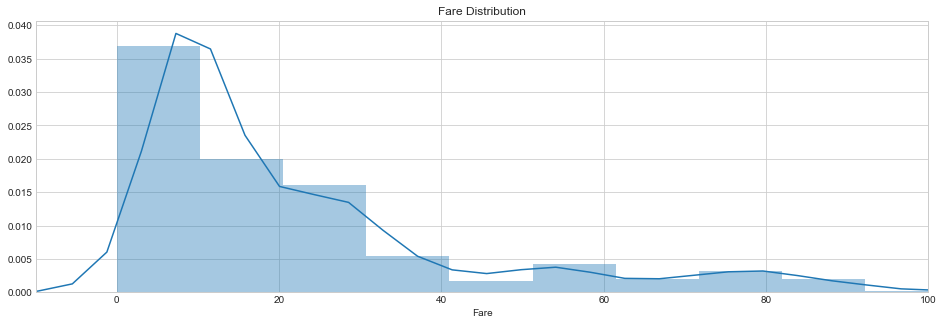

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [39]:
plt.figure(1, figsize=(16,5))
sns.distplot(train_2['Fare'])
plt.xlim(-10, 100)
plt.title('Fare Distribution')
plt.show()
train_2['Fare'].describe()

#### Age Distribution

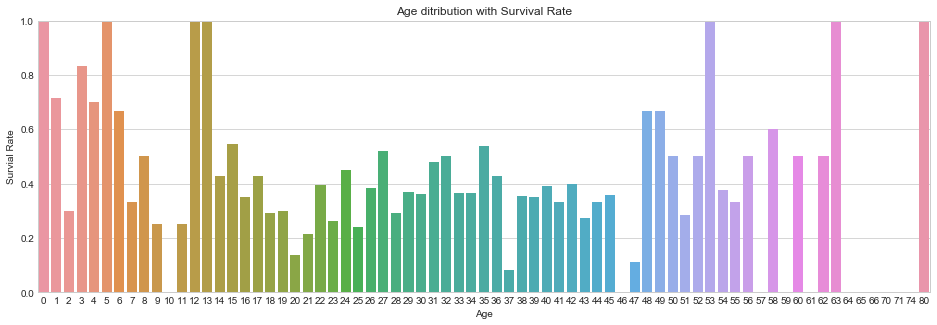

In [40]:
intage = train_2['Age'].astype(int)
intage = intage.to_frame()
intage['Survived'] = train_2['Survived']
avgage = intage.groupby(['Age'], as_index=False).mean()
plt.figure(1, figsize=(16,5))
plt.ylim(0,1)
sns.barplot(x='Age', y='Survived', data=avgage)
plt.title('Age ditribution with Survival Rate')
plt.ylabel('Survial Rate')
plt.show()

In [41]:
train_std = train_2.copy()
display(train_std.head())

def scale_age_fare(data):
    data['Age'].loc[data['Age'] <= 7] = 0
    data['Age'].loc[(data['Age'] > 7) & (data['Age'] <=14) ] = 1
    data['Age'].loc[(data['Age'] > 14) & (data['Age'] <=21) ] = 2
    data['Age'].loc[(data['Age'] > 21) & (data['Age'] <=28) ] = 3
    data['Age'].loc[(data['Age'] > 28) & (data['Age'] <=35) ] = 4
    data['Age'].loc[(data['Age'] > 35) & (data['Age'] <=42) ] = 5
    data['Age'].loc[(data['Age'] > 42) & (data['Age'] <=49) ] = 6
    data['Age'].loc[(data['Age'] > 49) & (data['Age'] <=56) ] = 7
    data['Age'].loc[(data['Age'] > 56) & (data['Age'] <=63) ] = 8
    data['Age'].loc[(data['Age'] > 63) & (data['Age'] <=70) ] = 9
    data['Age'].loc[data['Age'] > 70] = 10

    data['Fare'].loc[data['Fare'] <= 10] = 0
    data['Fare'].loc[(data['Fare'] > 10) & (data['Fare'] <=20) ] = 1
    data['Fare'].loc[(data['Fare'] > 20) & (data['Fare'] <=30) ] = 2
    data['Fare'].loc[(data['Fare'] > 30) & (data['Fare'] <=40) ] = 3
    data['Fare'].loc[(data['Fare'] > 40) & (data['Fare'] <=50) ] = 4
    data['Fare'].loc[data['Fare'] > 40] = 5

    return data
    
train_std = scale_age_fare(train_std)

train_std.head()

,Survived,Pclass,Name,Sex,Age,Family,Fare,Embarked
0,0,1,1,1,22.0,1,7.2500,2
1,1,3,5,0,38.0,1,71.2833,1
2,1,1,4,0,26.0,0,7.9250,2
3,1,3,5,0,35.0,1,53.1000,2
4,0,1,1,1,35.0,0,8.0500,2


,Survived,Pclass,Name,Sex,Age,Family,Fare,Embarked
0,0,1,1,1,3.0,1,0.0,2
1,1,3,5,0,5.0,1,5.0,1
2,1,1,4,0,3.0,0,0.0,2
3,1,3,5,0,4.0,1,5.0,2
4,0,1,1,1,4.0,0,0.0,2


<a id='results'></a>

## 5. b) 3rd K-NN 

In [42]:
knn_model(data=train_std, n_neighbor=list(range(2,11)))

,n_neighbor,Train_Manhattan,Test_Manhattan,Train_Euclidean,Test_Euclidean_dist
0,2,0.84691,0.815642,0.84691,0.815642
1,3,0.853933,0.843575,0.851124,0.849162
2,4,0.845506,0.865922,0.84691,0.871508
3,5,0.84691,0.865922,0.849719,0.871508
4,6,0.84691,0.849162,0.852528,0.865922
5,7,0.852528,0.871508,0.852528,0.865922
6,8,0.838483,0.849162,0.845506,0.871508
7,9,0.820225,0.826816,0.817416,0.826816
8,10,0.820225,0.826816,0.817416,0.826816


As shown above, the Euclidean mothod is obvious a better choice. We can see that the accuracy improves a lot for k=4 in train set, and both dropped after k=8. The accuracy for test reaches the highest at k=5. And the accuracy for test set is pretty stable which is good for our further predictions.

## 5. c) Visualization for Family, Age and Fare

#### 3D Scatter Plot

In [43]:
feature_scatter3d(train_std, 'Family', 'Age', 'Fare')

<a id='6. Predict Test data'></a>

# 6. Predict Test data
[Back to top](#top)
## 6. a) Comparison of 3 K-NN Model

As improving the representation of features through 1st, 2nd and 3rd prepared data, the accuracy is increasing as well. <br>
The highest accuracy for test set is reached in 3rd prepared data for k=5. Even though the train set has highest accuracy for k=6 and k=7, we are using n=5 for avoiding overfitting.
We are going to use Euclidean distance and k=5 for our final prediction.

Click [here](#results) to review result table for 3rd prepared data.

## 6. b) Processing features for Test Data

In [44]:
print('test set without feature processing.')
display(test_set.head())

test_set['Parch'] = test_set['SibSp'] + test_set['Parch']
test_set.drop(['SibSp'], axis=1, inplace=True)
test_set.rename(columns={'Parch': 'Family'}, inplace=True)

test_set['Embarked'] = test_set['Embarked'].map({'Q':0, 'C':1, 'S':2}).astype(int)

get_title(test_set)
test_set['Name'] = test_set['Name'].map({'Mr.':1, 'other.':2, 'Master.':3, 'Miss.':4, 'Mrs.':5})

scale_age_fare(test_set)

print('test set after feature processing.')
test_set.head()

test set without feature processing.


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q
1,1,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q
3,1,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,S
4,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,S


test set after feature processing.


,Pclass,Name,Sex,Age,Family,Fare,Embarked
0,1,1,1,4.0,0,0.0,0
1,1,5,0,6.0,1,0.0,2
2,2,1,1,8.0,0,0.0,0
3,1,1,1,3.0,0,0.0,2
4,1,5,0,3.0,2,1.0,2


## 6. c) Training the Model and Predict

In [45]:
x = train_std.drop(['Survived'], axis=1)
y = train_std['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test), '\n')
final_predict = knn.predict(test_set)
print('Printing first 10 output from the prediction:')
final_predict[:10]

0.871508379888 

Printing first 10 output from the prediction:


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

## 6. d) Finalizing outputs to CSV file

In [46]:
final_predict = pd.Series(final_predict)
output = pd.concat([passenger_id, final_predict], axis=1)
output.columns = ['PassengerId', 'Survived']
output.to_csv('/Users/tWo/Documents/UTD/BUAN 6341 Machine Learning/Project 1/output.csv', 
             index=False)

# Try other algorithm

In [48]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(random_state = 123)
lgr.fit(x_train, y_train)
print(lgr.score(x_train, y_train))
print(lgr.score(x_test, y_test))

0.800561797753
0.849162011173


In [49]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
print(nb.score(x_train, y_train))
print(nb.score(x_test, y_test))

0.77808988764
0.804469273743


In [50]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
print(svc.score(x_train, y_train))
print(svc.score(x_test, y_test))

0.838483146067
0.860335195531


<a id='Effort Table'></a>